In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Ott(Netflix).csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.shape

(7789, 11)

In [4]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [5]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [6]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [7]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

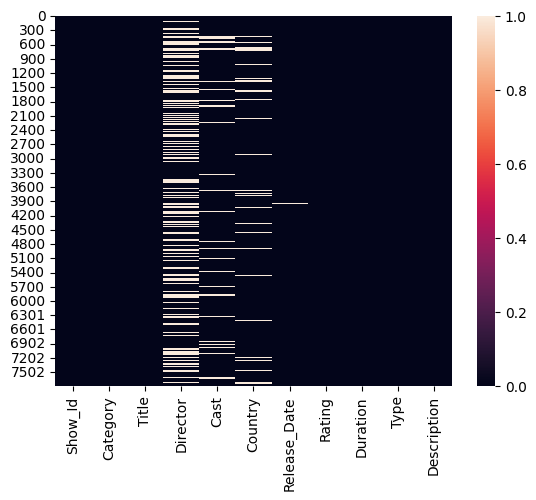

In [10]:
sns.heatmap(df.isnull())

## Q. 1 For "House of Cards", what is the show id and who is the director of this show?

In [11]:
df[df['Title'] == 'House of Cards' ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


## Q. 2 In which year highest number of the TV shows & movies were released? Show with bar graph.

In [12]:
df['Released_Date'] = pd.to_datetime(df['Release_Date'])

In [13]:
df['Released_Date'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Released_Date, dtype: int64

## Bar Graph

<Axes: >

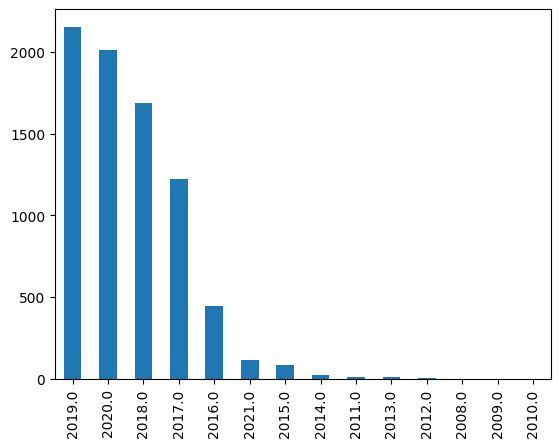

In [14]:
df['Released_Date'].dt.year.value_counts().plot(kind = 'bar')

## Q. 3 How many Movies & TV Shows are in the dataset? Show them with graph.

In [15]:
df['Category'].value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

<Axes: >

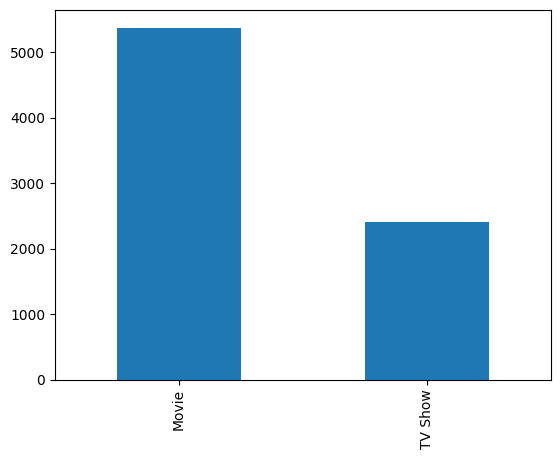

In [16]:
df['Category'].value_counts().plot(kind = 'bar')

## Q. 4 Show all the Movies that were released in year 2020.

In [17]:
df['Year'] = df['Released_Date'].dt.year

In [18]:
df[(df['Category'] == 'Movie') & (df['Year'] == 2020)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Released_Date,Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01,2020.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19,2020.0
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020-09-08,2020.0
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",2020-07-01,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,2020-05-19,2020.0
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,2020.0
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,2020.0
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,2020.0


## Q. 5 Show only the Titles of all TV shows that were released in India only.

In [19]:
df[(df['Country'] == 'India') & (df['Category'] == 'TV Show')]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

## Q. 6 Show Top 10 Directores, who gave the highest number of TV shows & Movies to Netflix?

In [20]:
df['Director'].value_counts()[:10]

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

## Q. 7 Show all the records, where "Category" is Movie and Type is "Comedies" or "Country" is United Kingdom

In [21]:
df[(df['Category'] == 'Movie')  & ((df['Type'] == 'Comedies') | (df['Country'] == 'United Kingdom'))][:2]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Released_Date,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0


## Q.8 In how many movies Tom Cruise was cast ?

In [22]:
drop_na = df.dropna()
drop_na[drop_na['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Released_Date,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


## Q. 9 What are  the different ratings defined by Netflix ?

In [23]:
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [24]:
df['Rating'].nunique()

14

## Q. 10 How many Movies got the 'TV-14' rating in Canada ?

In [25]:
df[(df['Category'] == 'Movie') & (df['Rating'] == 'TV-14') & (df['Country'] == 'Canada')].shape

(11, 13)

## Q. 11 How many TV shows got the 'R' rating after the year '2018' ?

In [26]:
df[(df['Category'] == 'TV Show') & (df['Year'] > 2018 ) & (df['Rating'] == 'R')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Released_Date,Year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


## Q. 12 What is the maximum duration of a Movie/Show on Netflix ?

In [27]:
df['Duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [28]:
df['Duration'].dtype

dtype('O')

In [29]:
df[['Minutes', 'Unit']] = df['Duration'].str.split(" ",expand = True)

In [30]:
df['Duration'].max()

'99 min'

## Q. 13 Which Individual Country has the Highest no. of TV shows ?  

In [31]:
data_Tv_show = df[df['Category'] == 'TV Show']

In [32]:
data_Tv_show.Country.value_counts()

United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: Country, Length: 183, dtype: int64

## Q. 14 How can we sort the dataset by year ?

---



In [33]:
df.sort_values(by = 'Year', ascending = False).head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Released_Date,Year,Minutes,Unit
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021-01-01,2021.0,128,min
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,"January 1, 2021",PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021-01-01,2021.0,86,min
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,"January 15, 2021",TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,2021-01-15,2021.0,1,Season
5955,s5955,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,"January 10, 2021",PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...,2021-01-10,2021.0,162,min
366,s367,Movie,Al acecho,Francisco D'Eufemia,"Rodrigo de la Serna, Belen Blanco, Walter Jako...",NaN,"January 12, 2021",TV-MA,81 min,"International Movies, Thrillers","Looking for a fresh start, a park ranger gets ...",2021-01-12,2021.0,81,min


## Q. 15 Find all instances where:

## Category is 'Movie' and Type is 'Dramas'

## or

## Category is 'TV Show' and Type is 'Kids TV'

In [34]:
df[((df['Category'] == 'Movie') & (df['Type'] == 'Dramas')) |
 ((df['Category'] == 'TV Show ') & (df['Type'] == "Kids' TV"))].head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Released_Date,Year,Minutes,Unit
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0,119,min
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019-12-15,2019.0,110,min
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,2011.0,95,min
295,s296,Movie,Across Grace Alley,Ralph Macchio,"Ben Hyland, Marsha Mason, Karina Smirnoff, Col...",United States,"December 1, 2016",TV-PG,24 min,Dramas,"A young boy, upset by his parents' divorce, be...",2016-12-01,2016.0,24,min
